In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
tbl1=pd.read_excel('C://Users//Arpit Akar//Downloads//Reynolds.xlsx')
tbl1

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


Text(0.5, 0, 'MonthsEmployed')

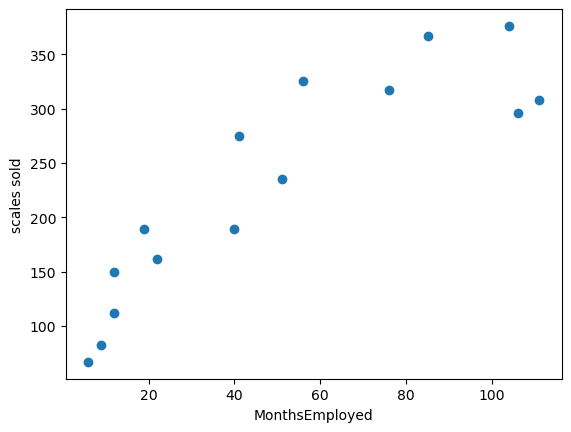

In [3]:
plt.scatter(tbl1['MonthsEmployed'],tbl1['ScalesSold'])
plt.ylabel('scales sold')
plt.xlabel('MonthsEmployed')

In [4]:
x=tbl1['MonthsEmployed']
y=tbl1['ScalesSold']
x2=sm.add_constant(x)
model=sm.OLS(y,x2)
Model=model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.24e-05
Time:                        22:08:59   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
E=Model.resid_pearson

In [6]:
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [7]:
yhat=Model.predict(x2)
yhat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

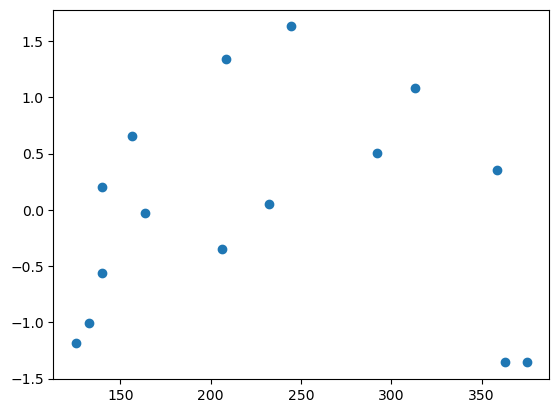

In [8]:
plt.scatter(yhat,E)

In [9]:
#why squared only? at the beggining start with power 2 only
x_sq=(x**2)
x_sq

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [10]:
x_new=np.column_stack((x,x_sq))
x_new2=sm.add_constant(x_new)
model2=sm.OLS(y,x_new2)
Model2=model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           8.75e-07
Time:                        22:09:00   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
E2=Model2.resid_pearson
E2

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [12]:
yhat2=Model2.predict(x_new2)

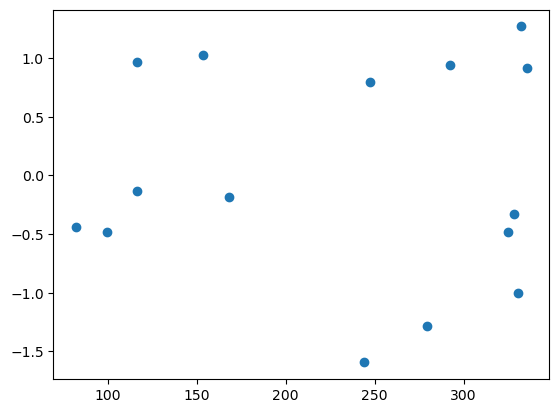

In [13]:
plt.scatter(yhat2,E2)

In [14]:
#here we have / 
#rectangular relationship now we can say that instead of going for curvilinaer/
#relationship

In [15]:
lolz=pd.read_excel('C://Users//Arpit Akar//Downloads//Tyler.xlsx')
lolz

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358
5,3.0,50,329
6,2.0,50,456
7,2.5,50,360
8,3.0,50,322
9,2.0,50,437


Text(0.5, 0, 'x1')

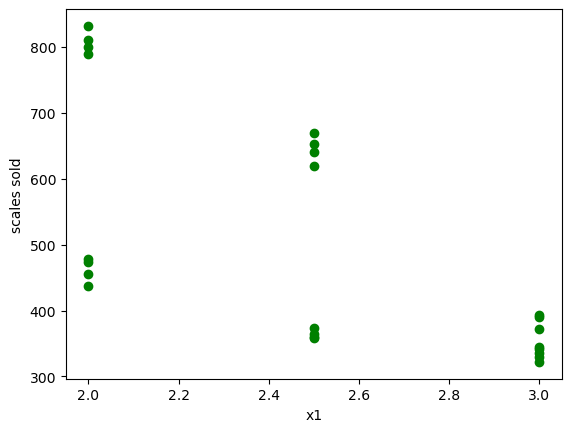

In [17]:
plt.scatter(lolz['Price'],lolz['Sales(1000s)'],color='green')
plt.ylabel('scales sold')
plt.xlabel('x1')

Text(0.5, 0, 'x2')

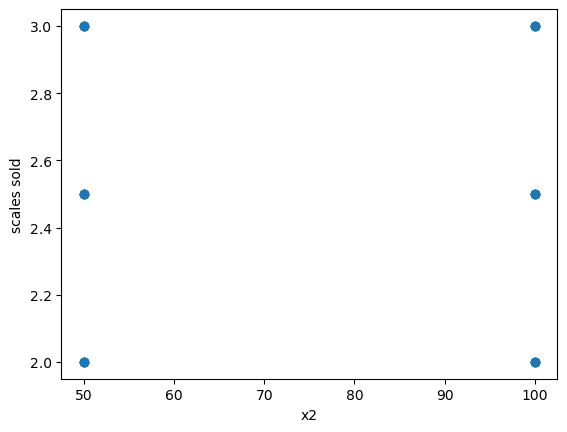

In [18]:
plt.scatter(lolz['AdvertisingExpenditure($1000s)'],lolz['Price'])
plt.ylabel('scales sold')
plt.xlabel('x2')

In [20]:
x=np.column_stack((lolz['AdvertisingExpenditure($1000s)'],lolz['Price']))
y=lolz['Sales(1000s)']
x2=sm.add_constant(x)
model=sm.OLS(y,x2)
Model=model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales(1000s)   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     59.82
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.13e-09
Time:                        22:18:48   Log-Likelihood:                -135.03
No. Observations:                  24   AIC:                             276.1
Df Residuals:                      21   BIC:                             279.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        864.1667    101.025      8.554      0.0

In [21]:
z1=lolz['AdvertisingExpenditure($1000s)']
z2=lolz['Price']
z3=z1*z2

In [24]:
x_new=np.column_stack((z1,z2,z3))
y=lolz['Sales(1000s)']
xnew2=sm.add_constant(x_new)
model2=sm.OLS(y,xnew2)
Model2=model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           9.26e-17
Time:                        22:25:55   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.0

In [25]:
#all are significant rsquare =0.978 Fprob alsovery less

In [26]:
arpi=pd.read_excel('C://Users//Arpit Akar//Downloads//MPG.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Arpit Akar/Downloads/MPG.xlsx'